# The Spark foundation #GRIPJULY21
## Task 2 Prediction using Unsupervised ML
## Problem statement:
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
##  By Chirag Jain

In [12]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

In [3]:
#loading the dataset from the sklearn library
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
df.shape

(150, 4)

In [7]:
##checking if dataset contains any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Using the Elbow method for the finding the optimal number of clusters

In [24]:
cluster_range=range(1,11)
cluster_errors = [] # list for storing the inertia
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=0)
    clusters.fit(df)
    cluster_errors.append(clusters.inertia_) # abppending the inertia/within cluster sum of square

In [16]:
cluster_errors

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384]

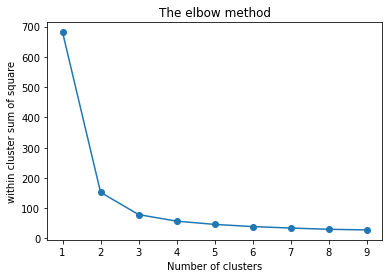

In [14]:
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of square') 
plt.show()

# from the above elbow method we can clearly see that the optimal number of clusters will be "3" for the k means clustering

In [26]:
clusters=KMeans(3)
#by default the init argument of KMeans is 'k-means++ ',max_iter is set as 300 ,random_state is set as None 
# and n_clusters is 8
clusters.fit(df)

KMeans(n_clusters=3)

In [27]:
clusters.labels_ #the classes/labels for each row  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [28]:
df['clusterid']=clusters.labels_

In [29]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusterid
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


In [30]:
x = df.iloc[:, [0, 1, 2, 3]].values

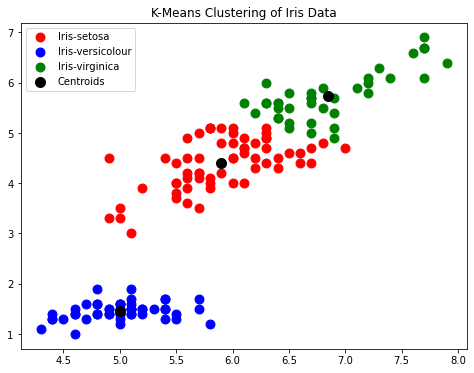

In [44]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[df.clusterid == 0, 0], x[df.clusterid == 0, 2], 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[df.clusterid == 1, 0], x[df.clusterid == 1, 2], 
            s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[df.clusterid == 2, 0], x[df.clusterid == 2, 2],
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')

plt.title('K-Means Clustering of Iris Data')
plt.legend()
plt.show()